In [33]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%matplotlib inline

audio_path = 'data/aa.wav'
y, sr = librosa.load(audio_path)
ori_sent = '베드 벌드 캣 도그 다운 '


In [34]:
IPython.display.Audio(data = y, rate = sr)

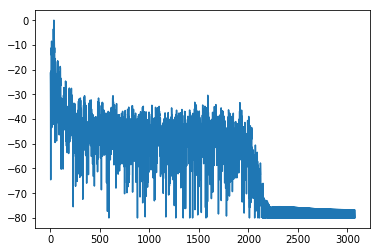

In [35]:
D = librosa.amplitude_to_db(librosa.stft(y[:1024]),ref=np.max)

plt.plot(D.flatten())
plt.show()

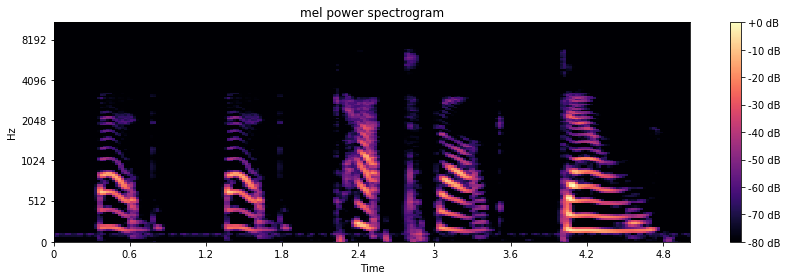

In [36]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

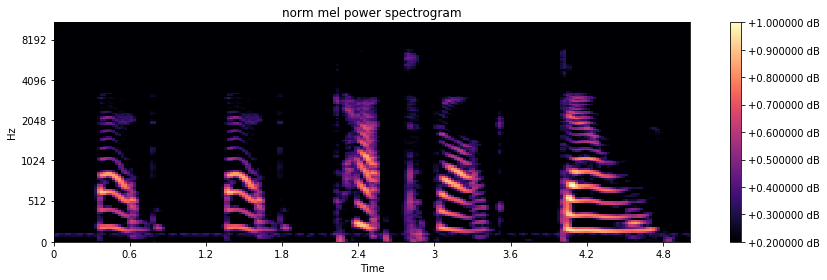

In [37]:
min_level_db = -100
def _normalize(S):
    return np.clip((S - min_level_db) / -min_level_db,0,1)

norm_S = _normalize(log_S)

plt.figure(figsize=(12,4))
librosa.display.specshow(norm_S,sr=sr,x_axis='time',y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+01f dB')
plt.tight_layout()
plt.show()